In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [99]:
cursos_coursera = pd.read_csv("./Datasets/Coursera_courses.csv")

In [100]:
cursos_coursera.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [101]:
cursos_coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [102]:
cursos_coursera.drop(columns="course_url",inplace=True)

In [103]:
coursera_reviews = pd.read_csv("./Datasets/Coursera_reviews.csv")

In [104]:
coursera_reviews.head()

,Unnamed: 0,reviews,reviewers,date_reviews,rating,course_id
0,0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [105]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162950 entries, 0 to 1162949
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0    1162950 non-null  int64 
 1   reviews       1162950 non-null  object
 2   reviewers     1162950 non-null  object
 3   date_reviews  1162950 non-null  object
 4   rating        1162950 non-null  int64 
 5   course_id     1162950 non-null  object
dtypes: int64(2), object(4)
memory usage: 53.2+ MB


In [106]:
coursera_reviews.describe()

,Unnamed: 0,rating
count,1.162950e+06,1.162950e+06
mean,7.254235e+05,4.673347e+00
std,4.255871e+05,7.251819e-01
min,0.000000e+00,1.000000e+00
25%,3.530652e+05,5.000000e+00
50%,7.237905e+05,5.000000e+00
75%,1.097828e+06,5.000000e+00
max,1.454595e+06,5.000000e+00


In [107]:
coursera_reviews.dropna(inplace=True)

In [108]:
coursera_reviews.shape

(1162950, 6)

In [109]:
coursera_reviews["reviews"]

0          Pretty dry, but I was able to pass with just t...
1          would be a better experience if the video and ...
2          Information was perfect! The program itself wa...
3          A few grammatical mistakes on test made me do ...
4          Excellent course and the training provided was...
                                 ...                        
1162945                 the hardest one but very interrsting
1162946                         Awesome course to take!!!!!!
1162947                         Awesome course to take!!!!!!
1162948                         Awesome course to take!!!!!!
1162949                                     The best ever !!
Name: reviews, Length: 1162950, dtype: object

# NO VOLVER A CORRER!

In [110]:
# import nltk
# import re

# # Download necessary resources for NLTK
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('vader_lexicon')

# # Function to check if a review is poorly written
# def mal_escrito(review):
#     # Tokenize the review text
#     tokens = nltk.word_tokenize(review)
  
#     # Check if the review has less than a certain number of tokens
#     if len(tokens) < 5:
#         return True
  
#     # Perform part-of-speech tagging on the tokens
#     tagged_tokens = nltk.pos_tag(tokens)
  
#     # Check if the review has mostly nouns and pronouns
#     noun_count = 0
#     pronoun_count = 0
#     for token, tag in tagged_tokens:
#         if re.match(r'NN.*', tag):
#             noun_count += 1
#         elif re.match(r'PRP.*', tag):
#             pronoun_count += 1
  
#     total_count = noun_count + pronoun_count
#     if total_count > 0 and (noun_count / total_count) < 0.5:
#         return True
  
#     return False

# # Apply the is_poorly_written function to drop poorly written reviews
# coursera_reviews = coursera_reviews[~coursera_reviews["reviews"].apply(mal_escrito)]
# coursera_reviews.to_csv("./Datasets/Coursera_reviews.csv")


In [111]:
coursera_reviews["reviews"].drop_duplicates(inplace=True)

In [112]:
coursera_reviews["reviewers"] = coursera_reviews["reviewers"].str.strip()

In [113]:
coursera_reviews["reviewers"].value_counts()

reviewers
By Deleted A        4052
By Muhammad A        506
By Michael S         400
By David M           388
By Abhishek S        376
                    ... 
By PRAJWAL A K         1
By Mayesha M R M       1
By Vadakattu A S       1
By Terrance R          1
By Abiyyu F D          1
Name: count, Length: 234995, dtype: int64

In [114]:
coursera_reviews.drop(coursera_reviews[coursera_reviews["reviewers"]=="By Deleted A"].index,inplace=True)

In [115]:
coursera_reviews.drop(columns="date_reviews",inplace=True)

In [116]:
coursera_reviews.reset_index(inplace=True)

In [117]:
coursera_reviews.drop(columns="index",inplace=True)

In [118]:
coursera_reviews.head()

,Unnamed: 0,reviews,reviewers,rating,course_id
0,0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training
1,1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training
2,2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training
3,3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training
4,4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training


In [119]:
cursos_coursera.head()

,name,institution,course_id
0,Machine Learning,Stanford University,machine-learning
1,Indigenous Canada,University of Alberta,indigenous-canada
2,The Science of Well-Being,Yale University,the-science-of-well-being
3,Technical Support Fundamentals,Google,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training


In [120]:
coursera_completo = coursera_reviews.merge(cursos_coursera, on="course_id")

In [121]:
coursera_completo

,Unnamed: 0,reviews,reviewers,rating,course_id,name,institution
0,0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
1,1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
2,2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
3,3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
4,4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
...,...,...,...,...,...,...,...
1158893,1451495,Awesome!!!!!!!,By Sammy,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158894,1451498,excelente!!!!!,By Maisa R A,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158895,1451509,Great so far!!,By Derrick W,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158896,1451534,Great so far!!,By Derrick W,5,technical-support-fundamentals,Technical Support Fundamentals,Google


In [122]:
coursera_completo["reviews"] = coursera_completo["reviews"].loc[~coursera_completo["reviews"].duplicated()]


In [123]:
coursera_completo.dropna(inplace=True)

In [124]:
coursera_completo["name"].value_counts()

name
Programming for Everybody (Getting Started with Python)                           13421
Machine Learning                                                                  12247
Neural Networks and Deep Learning                                                 11900
Learning How to Learn: Powerful mental tools to help you master tough subjects    10758
Technical Support Fundamentals                                                     9669
                                                                                  ...  
Epigenetic Control of Gene Expression                                                 2
Entreprise et changement climatique                                                   2
Entrepreneurship Strategy: From Ideation to Exit                                      1
Introduction to Healthcare                                                            1
Curanderismo: Traditional Healing Using Plants                                        1
Name: count, Length: 602, d

In [125]:
conteo_names = coursera_completo["name"].value_counts()
coursera_completo = coursera_completo[coursera_completo["name"].isin(conteo_names[conteo_names > 5000].index)]


In [126]:
coursera_completo

,Unnamed: 0,reviews,reviewers,rating,course_id,name,institution
13795,15727,I did not find this course helpful. The assign...,By Eric V H,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13796,15728,I got a 95% and maybe I learned something but ...,By Connor B,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13797,15729,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13798,15730,We tried to use this class to teach a brown ba...,By Steve M,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13799,15731,"To be honest, I thought the course stumbled an...",By Terence P,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
...,...,...,...,...,...,...,...
1158865,1451075,great class !!!,By Olibrice D,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158883,1451440,loved it\(00)/,By Austin P,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158885,1451445,Awesome!!!!!!!,By Sammy,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158886,1451448,excelente!!!!!,By Maisa R A,5,technical-support-fundamentals,Technical Support Fundamentals,Google


In [127]:
coursera_graph = coursera_completo[["rating","course_id"]]

In [128]:
coursera_graph = coursera_graph.groupby(by="course_id")["rating"].sum()

In [129]:
coursera_graph = coursera_graph.to_frame().reset_index()


In [130]:
coursera_graph.sort_values("rating",ascending=False)

,course_id,rating
5,python,62614
3,machine-learning,58319
4,neural-networks-deep-learning,56955
2,learning-how-to-learn,51918
7,technical-support-fundamentals,46170
6,python-data,42476
8,the-science-of-well-being,32936
1,excel-essentials,27869
0,ai-for-everyone,26766
9,what-is-datascience,26452


In [131]:
rating_conteo = coursera_completo.groupby('course_id')['rating'].value_counts().unstack(fill_value=0)

In [132]:
rating_conteo

rating,1,2,3,4,5
course_id,,,,,
ai-for-everyone,8,10,52,608,4830
excel-essentials,16,11,32,475,5167
learning-how-to-learn,37,24,134,1384,9179
machine-learning,62,55,204,2095,9831
neural-networks-deep-learning,33,44,247,1787,9789
python,85,72,383,3169,9712
python-data,22,18,96,860,7738
technical-support-fundamentals,91,51,189,1280,8058
the-science-of-well-being,23,10,25,307,6318


In [133]:
rating_porcentaje = rating_conteo.div(rating_conteo.sum(axis=1), axis=0) * 100

In [134]:
rating_porcentaje.round(2)

rating,1,2,3,4,5
course_id,,,,,
ai-for-everyone,0.15,0.18,0.94,11.04,87.69
excel-essentials,0.28,0.19,0.56,8.33,90.63
learning-how-to-learn,0.34,0.22,1.25,12.86,85.32
machine-learning,0.51,0.45,1.67,17.11,80.27
neural-networks-deep-learning,0.28,0.37,2.08,15.02,82.26
python,0.63,0.54,2.85,23.61,72.36
python-data,0.25,0.21,1.10,9.85,88.60
technical-support-fundamentals,0.94,0.53,1.95,13.24,83.34
the-science-of-well-being,0.34,0.15,0.37,4.59,94.54


In [135]:
coursera_titulos = ' '.join(coursera_completo['name'])

In [136]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(coursera_titulos)

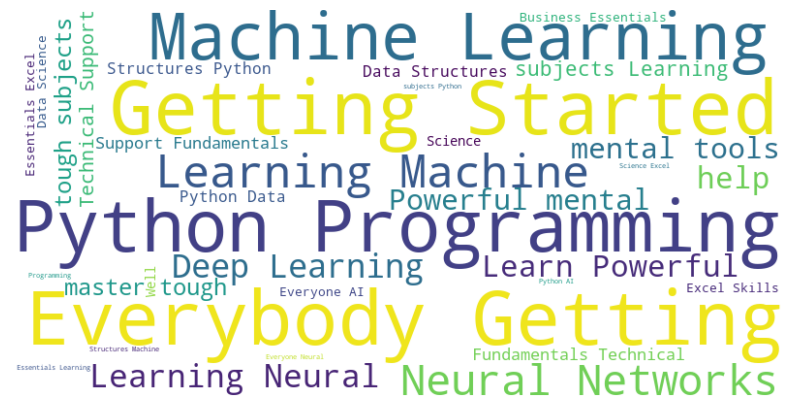

In [137]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [138]:
coursera_completo.to_csv("./SQL/coursera_normalizado.csv")

In [139]:
edx = pd.read_csv("./Datasets/edx_courses.csv")

In [140]:
edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [141]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [142]:
edx.drop(columns=["summary","course_type","institution","instructors","course_effort","course_description","course_syllabus","course_url"],inplace=True)

In [143]:
edx.columns

Index(['title', 'n_enrolled', 'Level', 'subject', 'language', 'subtitles',
       'course_length', 'price'],
      dtype='object')

In [144]:
edx[["price"]]

,price
0,FREE-Add a Verified Certificate for $49 USD
1,FREE-Add a Verified Certificate for $49 USD
2,FREE-Add a Verified Certificate for $90 USD
3,FREE-Add a Verified Certificate for $199 USD
4,FREE-Add a Verified Certificate for $249 USD
...,...
970,FREE-Add a Verified Certificate for $25 USD
971,FREE-Add a Verified Certificate for $139 USD
972,FREE-Add a Verified Certificate for $139 USD
973,FREE-Add a Verified Certificate for $25 USD


In [145]:
edx['price'] = edx['price'].str.extract(r"(\d+)").astype(float)

In [146]:
edx[edx["price"]<10]

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
6,Leading High-Performing Teams,"32,847",Intermediate,Communication,English,English,10 Weeks,5.0
136,Design Thinking and Creativity for Innovation,"47,549",Intermediate,Business & Management,English,English,10 Weeks,5.0
237,Tourism and Travel Management,"38,503",Introductory,Business & Management,English,English,7 Weeks,5.0
417,Solid Waste Management,"7,668",Introductory,Environmental Studies,English,English,6 Weeks,5.0
458,Unlocking Investment and Finance in Emerging M...,"29,171",Introductory,Economics & Finance,English,English,4 Weeks,5.0
466,e-Learning on Digital Agriculture,"6,238",Introductory,Environmental Studies,English,English,5 Weeks,5.0
564,The Future of Work: Preparing for Disruption,"43,125",Introductory,Economics & Finance,English,"اللغة العربية, English, Español, Français, Рус...",5 Weeks,5.0


In [147]:
edx.dropna(inplace=True)

In [148]:
edx.sort_values("n_enrolled",ascending=False)

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
412,Introduction to Aeronautical Engineering,"99,971",Introductory,Engineering,English,English,7 Weeks,50.0
344,Computer Graphics,"98,553",Intermediate,Computer Science,English,"English, 中文",6 Weeks,99.0
261,Introducción a la gestión de proyectos,"98,517",Introductory,Business & Management,Español,Español,5 Weeks,50.0
329,How to Code: Simple Data,"98,113",Introductory,Computer Science,English,English,7 Weeks,125.0
82,Introduction to Corporate Finance,"98,093",Introductory,Business & Management,English,English,4 Weeks,225.0
...,...,...,...,...,...,...,...,...
783,Globalization: Past and Future,"10,127",Introductory,History,English,"English, Русский",4 Weeks,25.0
505,Digital Transformation in Business,"10,118",Advanced,Business & Management,English,English,7 Weeks,214.0
923,Age of Sustainable Development,"10,019",Intermediate,Social Sciences,English,"English, Português, Русский",14 Weeks,49.0
29,IELTS Academic Test Preparation,"1,103,777",Introductory,Communication,English,English,8 Weeks,99.0


In [149]:
edx["n_enrolled"] = edx["n_enrolled"].str.replace(",","")
edx["n_enrolled"] = edx["n_enrolled"].astype("Int64")

In [150]:
edx.sort_values("n_enrolled",ascending=False)

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
2,CS50's Introduction to Computer Science,2442271,Introductory,Computer Science,English,English,12 Weeks,90.0
29,IELTS Academic Test Preparation,1103777,Introductory,Communication,English,English,8 Weeks,99.0
31,TOEFL® Test Preparation: The Insider’s Guide,1022489,Introductory,Communication,English,English,6 Weeks,49.0
23,CS50's Web Programming with Python and JavaScript,698950,Intermediate,Computer Science,English,English,12 Weeks,90.0
64,Introduction to Linux,642088,Introductory,Computer Science,English,English,14 Weeks,199.0
...,...,...,...,...,...,...,...,...
794,General Overview of Cannabis and the Industry’...,5048,Introductory,Environmental Studies,English,English,4 Weeks,199.0
787,Tools for Academic Engagement in Public Policy,5035,Introductory,Communication,English,English,3 Weeks,199.0
676,Enterprise Selling,5020,Introductory,Business & Management,English,English,6 Weeks,149.0
722,Deep Learning Essentials,5018,Intermediate,Computer Science,English,English,5 Weeks,149.0


In [151]:
edx_pr = edx[["n_enrolled","price"]]

In [152]:
edx_price = edx_pr.groupby("price")["n_enrolled"].sum()

In [153]:
edx_price = edx_price.to_frame().reset_index()

In [154]:
edx_price.sort_values("n_enrolled",ascending=False)

,price,n_enrolled
8,49.0,10063575
18,99.0,9952448
29,199.0,4596439
17,90.0,3264459
9,50.0,3192084
24,149.0,2673189
25,150.0,1746238
33,249.0,1347861
4,25.0,1223102
23,139.0,1094260


In [155]:
edx_len = edx[["n_enrolled","course_length"]]

In [156]:
edx_lenght = edx_len.groupby("course_length")["n_enrolled"].sum()

In [157]:
edx_lenght = edx_lenght.to_frame().reset_index()

In [158]:
edx_lenght.sort_values("n_enrolled",ascending=False)

,course_length,n_enrolled
14,6 Weeks,7691916
3,12 Weeks,5910274
16,8 Weeks,5846822
12,4 Weeks,5748168
13,5 Weeks,5251679
1,10 Weeks,4467724
15,7 Weeks,3579155
6,15 Weeks,1288078
5,14 Weeks,1203766
17,9 Weeks,1137350


In [159]:
edx_lev = edx[["Level","n_enrolled"]]

In [160]:
edx_level = edx_lev.groupby("Level")["n_enrolled"].sum()

In [161]:
edx_level = edx_level.to_frame().reset_index()

In [162]:
edx_level.sort_values("n_enrolled",ascending=False)

,Level,n_enrolled
2,Introductory,32350969
1,Intermediate,10076928
0,Advanced,2962732


In [163]:
edx_lan = edx[["language","n_enrolled"]]

In [164]:
edx_language = edx_lan.groupby("language")["n_enrolled"].sum()

In [165]:
edx_language = edx_language.to_frame().reset_index()

In [166]:
edx_language.sort_values("n_enrolled",ascending=False)

,language,n_enrolled
1,English,41068628
2,Español,3704975
4,Italiano,281585
3,Français,161848
7,日本語,62757
6,中文,56158
5,Português,44021
0,Deutsch,10657


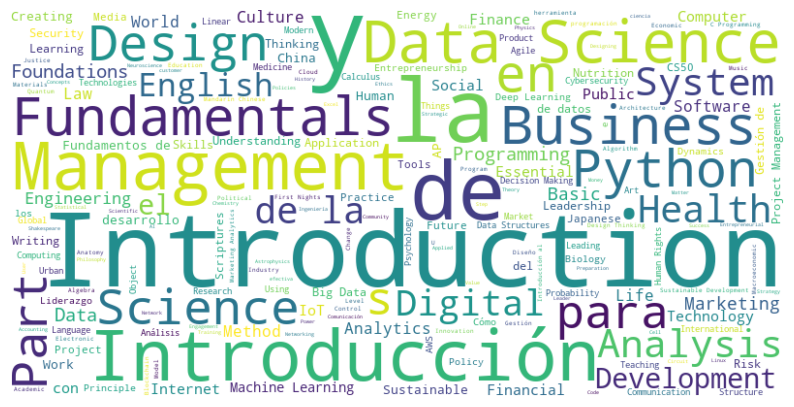

In [167]:
edx_titulos = " ".join(edx["title"])
wordcloudedx = WordCloud(width=800, height=400, background_color='white').generate(edx_titulos)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloudedx, interpolation='bilinear')
plt.axis('off')
plt.show()

In [168]:
edx.to_csv("./SQL/edx_normalizado.csv")

In [169]:
udemy = pd.read_csv("./Datasets/udemy_courses.csv")

In [170]:
udemy

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [171]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [172]:
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [173]:
udemy_paid = udemy[["is_paid","num_subscribers"]]

In [174]:
udemy_paid = udemy_paid.groupby(by="is_paid")["num_subscribers"].sum()

In [175]:
udemy_paid = udemy_paid.to_frame().reset_index()

In [176]:
udemy_paid

,is_paid,num_subscribers
0,False,3575525
1,True,8183595


<Axes: xlabel='is_paid', ylabel='num_subscribers'>

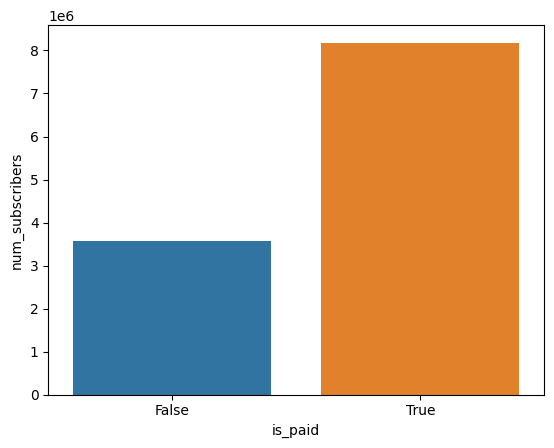

In [177]:
sns.barplot(data=udemy_paid,x="is_paid",y="num_subscribers")

In [178]:
udemy_gratis = udemy[udemy["price"]== 0]

In [179]:
udemy_pago = udemy[udemy["price"] != 0]

In [180]:
usuarios_gratis = udemy_gratis["num_subscribers"].sum()

In [181]:
usuarios_pagos=  udemy_pago["num_subscribers"].sum()

In [182]:
udemy[udemy["course_title"] == "Acoustic Blues Guitar Lessons"]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2062,99324,Acoustic Blues Guitar Lessons,https://www.udemy.com/finger-picking-blues-gui...,False,0,8217,109,10,Intermediate Level,1.0,2013-09-30T20:45:20Z,Musical Instruments
2067,112314,Acoustic Blues Guitar Lessons,https://www.udemy.com/jim-bruce-blues-guitar-l...,True,125,1284,136,40,Intermediate Level,12.5,2013-11-28T08:54:00Z,Musical Instruments
2158,647276,Acoustic Blues Guitar Lessons,https://www.udemy.com/acoustic-blues-guitar-le...,True,75,189,18,101,Intermediate Level,4.5,2016-01-10T21:39:42Z,Musical Instruments


In [183]:
(usuarios_pagos / usuarios_gratis) * 100

228.87813677711665

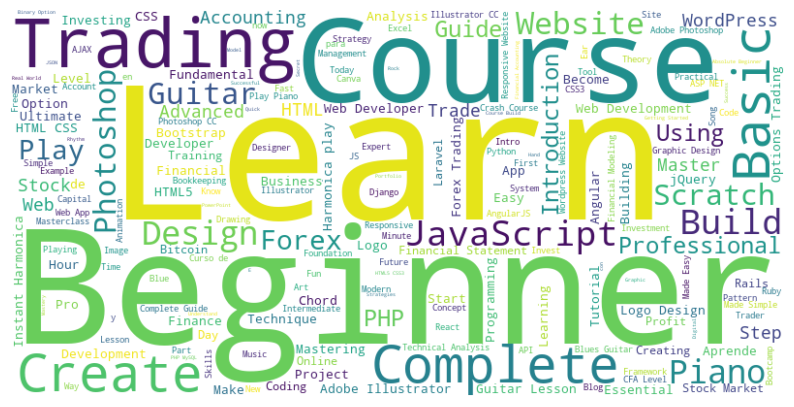

In [184]:
udemy_titulos = " ".join(udemy["course_title"])
wordcloududemy = WordCloud(width=800, height=400, background_color='white').generate(udemy_titulos)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloududemy, interpolation='bilinear')
plt.axis('off')
plt.show()

In [185]:
udemy.to_csv("./SQL/udemy_normalizado.csv")